# 1.  IRIS DATASET

In [9]:
# Import all the packages
import numpy as np
from math import sqrt
from collections import Counter
import random
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot.as plt

In [22]:
# Load iris dataset
iris = load_iris()
iris_data = iris['data']
iris_labels = iris['target']

full_iris = np.c_[iris_data, iris_labels]

# Shuffle the full data randomly
random.shuffle(full_iris)

# Create a dataframe
full_data = pd.DataFrame(data=full_iris, columns=iris['feature_names'] + ["target"])
full_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,5.1,3.5,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,5.1,3.5,1.4,0.2,0.0
4,4.9,3.0,1.4,0.2,0.0


In [28]:
# Distribution of data_labels and other information
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

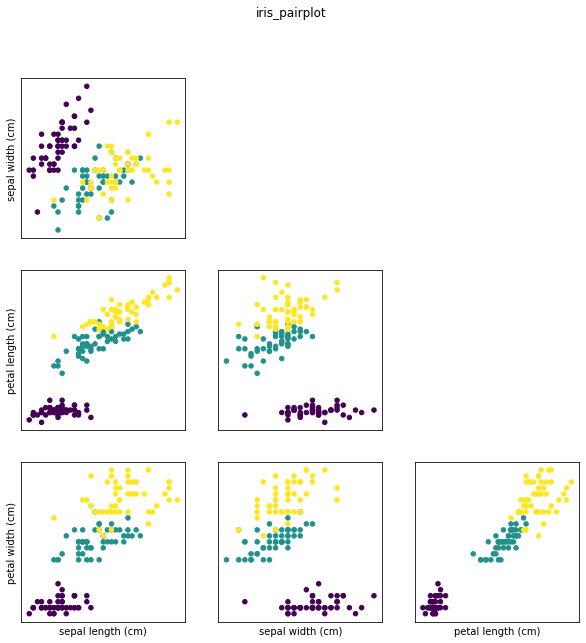

In [34]:
%matplotlib inline
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i,j].scatter(iris_data[:,j], iris_data[:,i+1], c=iris_labels, s=20)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i == 2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i,j].set_ylabel(iris['feature_names'][i+1])
        if j > i:
            ax[i,j].set_visible(False)

In [13]:
# Split the full data into 75% for training and 25% for testing
full_train = full_iris[:int(0.75*len(full_iris))]
full_test = full_iris[int(0.75*len(full_iris)):]

In [16]:
# Ceate a dictionary for train and test samples classifying each observation with their correct label
X_train = {0:[], 1:[], 2:[]}
X_test = {0:[], 1:[], 2:[]}

for i in full_train:
    X_train[i[-1]].append(i[:-1])

for i in full_test:
    X_test[i[-1]].append(i[:-1])

In [22]:
# K Nearest Neighbors function
def knn(X_train, X_test, k):
    dist = []
    for i in X_train:
        for j in X_train[i]:
            #Euclidean distance formula
            euclidean_dist = np.sqrt(np.sum((np.array(j)-np.array(X_test))**2))
            #Add to the 'dist' list, the euclidean distance plus its training sample
            dist.append([euclidean_dist, i])
        #Sort the list from the smallest to the largest result and take the first k observations
        neighbors = [i[1] for i in sorted(dist)[:k]]
        #Create a dictionary of the neighbors list and take the most common observation 
        nearest = Counter(neighbors).most_common(1)[0][0]
    return nearest

In [30]:
# Exercise for 1-Nearest Neighbor
# Measure the distance of each test sample with every train sample 
correct = 0
count = 0

for i in X_test:
    for j in X_test[i]:
        #Calculate the euclidean distance and return the nearest neighbor label
        nearest = knn(X_train, j, 1)
        #Verify if the true label is the same as our prediction
        if i == nearest:
            correct += 1
        count += 1
print('The error rate is:',round((1-correct/count),4))
print('Number of errors:',count-correct)

The error rate is: 0.0526
Number of errors: 2


In [34]:
# Exercise for 3-Nearest Neighbor
# Measure the distance of each test sample with every train sample 
correct = 0
count = 0

for i in X_test:
    for j in X_test[i]:
        # Calculate the euclidean distance and return the nearest neighbor label
        nearest = knn(X_train, j, 3)
        # Verify if the true label is the same as our prediction
        if i == nearest:
            correct += 1
        count += 1
print('The error rate is:',round((1-correct/count),4))
print('Number of errors:',count-correct)

The error rate is: 0.0789
Number of errors: 3


__Comments:__ The results from the iris dataset show us a clear increase of the error rate from 1NN to 3NN. This fact it is because the possibility of error is higher when we consider more neighbors for our prediction. Even though 1NN is more accurate, we could be overfitting our data.

Notice that this function can be also test with any k for NN, we just need to substitute the input number in the knn function.

# 2. IONOSPHERE DATASET

In [36]:
# Load the ionosphere dataset
X = np.genfromtxt("ionosphere.txt", delimiter=",",
usecols=np.arange(34))
y = np.genfromtxt("ionosphere.txt", delimiter=",",
usecols=34, dtype='int')

In [47]:
print(f'X shape: {X.shape}\nY shape: {y.shape}')

X shape: (351, 34)
Y shape: (351,)


In [45]:
# Join the samples and their labels
full_ionosphere=np.c_[X,y]

col_names = list(map(lambda x: f'X{x}', range(1,35)))

# Create a dataframe
iono_data = pd.DataFrame(full_ionosphere, columns=col_names+['Y'])
iono_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X26,X27,X28,X29,X30,X31,X32,X33,X34,Y
0,1.0,0.0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1.0
1,1.0,0.0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,-1.0
2,1.0,0.0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1.0
3,1.0,0.0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,-1.0
4,1.0,0.0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1.0


In [43]:
# Shuffle the full data randomly
random.shuffle(full_ionosphere)

In [45]:
# Split the full data into 75% for training and 25% for testing
train_data = full_ionosphere[:int(0.75*len(full_ionosphere))]
test_data = full_ionosphere[int(0.75*len(full_ionosphere)):]

In [47]:
# Ceate a dictionary for train and test samples classifying each observation with their correct label
X_train = {1:[],-1:[]}
X_test = {1:[],-1:[]}
for i in train_data:
    X_train[i[-1]].append(i[:-1])

for i in test_data:
    X_test[i[-1]].append(i[:-1])

In [48]:
# Exercise for 1-Nearest Neighbor
# Measure the distance of each test sample with every train sample 
correct = 0
count = 0

for i in X_test:
    for j in X_test[i]:
        # Calculate the euclidean distance and return the nearest neighbor label
        nearest = knn(X_train, j, 1)
        # Verify if the true label is the same as our prediction
        if i == nearest:
            correct += 1
        count += 1
print('The error rate is:',round((1-correct/count),4))
print('Number of errors:',count-correct)

The error rate is: 0.0568
Number of errors: 5


In [49]:
# Exercise for 3-Nearest Neighbor
# Measure the distance of each test sample with every train sample 
correct = 0
count = 0

for i in X_test:
    for j in X_test[i]:
        # Calculate the euclidean distance and return the nearest neighbor label
        nearest = knn(X_train, j, 3)
        # Verify if the true label is the same as our prediction
        if i == nearest:
            correct += 1
        count += 1
print('The error rate is:',round((1-correct/count),4))
print('Number of errors:',count-correct)

The error rate is: 0.0795
Number of errors: 7


__Comments__: The results from the ionosphere dataset show us similar error rates as the iris example from 1NN to 3NN. This fact, it is probably for the same reason, the number of neighbors. Then, we could be facing the same issue of overfitting our data. 

The main difference between the two examples is the number of errors, which is higher in the second dataset. The error rates are similar, because the data size of the ionosphere is bigger. 

Notice that this function can be also test with any k for NN, we just need to substitute the number in the knn() function.